# Challenges 03 Pandas

Topic:        Challenge Set 2  
Subject:      Explore movie data  
Date:         10/08/2018  
Name:         Emma Huang

# Import Libraries and Dataframe

In [76]:
# import libraries

# dataframe stuff
import pandas as pd
import numpy as np

# graphing stuff
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# other stuff
import re
import datetime
from scipy import stats

In [77]:
# read data frame
df = pd.read_csv('2013_movies.csv')
# convert to datetime
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])

# Challenge 1

Plot domestic total gross over time.

In [78]:
# get the mean on each day
total_gross = (df
            .groupby(['ReleaseDate'],as_index=False)
            .mean()
              )

In [79]:
# create the variable list to graph
dates = total_gross['ReleaseDate'].values
gross = total_gross['DomesticTotalGross'].values

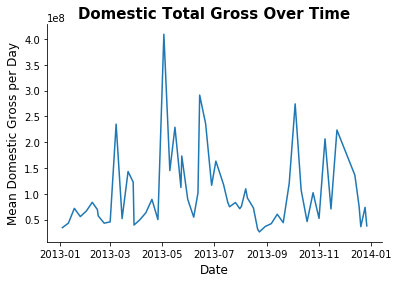

In [80]:
# plot
plt.plot(dates, gross);
plt.title('Domestic Total Gross Over Time', fontsize = 15, weight = 'bold')
plt.ylabel('Mean Domestic Gross per Day', fontsize = 12)
plt.xlabel('Date', fontsize = 12)
sns.despine()

# Challenge 2

Plot runtime vs. domestic total gross.

In [81]:
# get the mean for each runtime
total_runtime = (df
                 .groupby(['Runtime'],as_index=False)
                 .mean()
                )

In [82]:
# create the variable list to graph
runtime = total_runtime['Runtime'].values
gross = total_runtime['DomesticTotalGross'].values

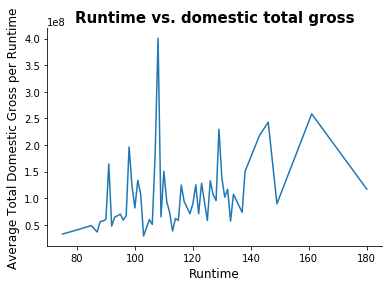

In [83]:
# plot
plt.plot(runtime, gross);
plt.title('Runtime vs. domestic total gross', fontsize = 15, weight = 'bold')
plt.ylabel('Average Total Domestic Gross per Runtime', fontsize = 12)
plt.xlabel('Runtime', fontsize = 12)
sns.despine();

# Challenge 3

Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.

In [84]:
# get the mean for each rating
gb_rating = (df
             .groupby(['Rating'],as_index=False)['Runtime', 'DomesticTotalGross']
             .mean()
            )

In [85]:
gb_rating

,Rating,Runtime,DomesticTotalGross
0,G,107.000000,2.684928e+08
1,PG,99.933333,1.311357e+08
2,PG-13,117.510638,1.114498e+08
3,R,110.729730,6.989243e+07


# Challenge 4

Plot the release date vs the domestic total gross.

In [86]:
# get the mean for each rating on each day
gb_rating = (df
             .groupby(['Rating', 'ReleaseDate'],as_index=False)
             .mean()
              )

In [87]:
# g data
g_mask = (gb_rating['Rating'] == 'G')
g_df = gb_rating[g_mask]

g_date = g_df['ReleaseDate'].values
g_gross = g_df['DomesticTotalGross'].values

# pg data
pg_mask = (gb_rating['Rating'] == 'PG')
pg_df = gb_rating[pg_mask]

pg_date = pg_df['ReleaseDate'].values
pg_gross = pg_df['DomesticTotalGross'].values

# pg-13 data
pg13_mask = (gb_rating['Rating'] == 'PG-13')
pg13_df = gb_rating[pg13_mask]

pg13_date = pg13_df['ReleaseDate'].values
pg13_gross = pg13_df['DomesticTotalGross'].values

# r data
r_mask = (gb_rating['Rating'] == 'R')
r_df = gb_rating[r_mask]

r_date = r_df['ReleaseDate'].values
r_gross = r_df['DomesticTotalGross'].values

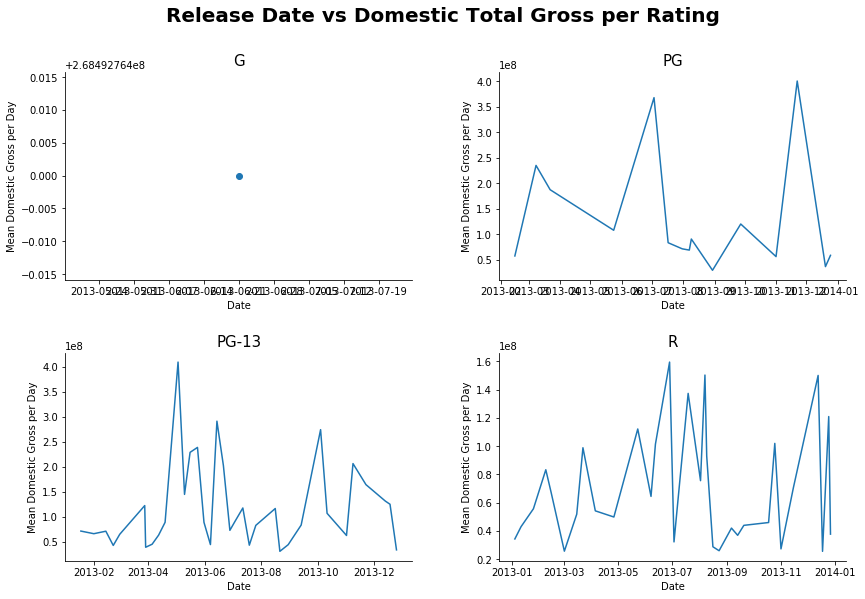

In [88]:
# plot
plt.figure(figsize=[14,9])

plt.suptitle('Release Date vs Domestic Total Gross per Rating',fontsize = 20, weight = 'bold')
plt.subplots_adjust(wspace=0.25, hspace=0.35)

# g
plt.subplot(2,2,1)
plt.scatter(g_date, g_gross)
plt.title('G', fontsize = 15)
plt.ylabel('Mean Domestic Gross per Day', fontsize = 10)
plt.xlabel('Date', fontsize = 10)

# pg
plt.subplot(2,2,2)
plt.plot(pg_date, pg_gross)
plt.title('PG', fontsize = 15)
plt.ylabel('Mean Domestic Gross per Day', fontsize = 10)
plt.xlabel('Date', fontsize = 10)

# pg 13
plt.subplot(2,2,3)
plt.plot(pg13_date, pg13_gross)
plt.title('PG-13', fontsize = 15)
plt.ylabel('Mean Domestic Gross per Day', fontsize = 10)
plt.xlabel('Date', fontsize = 10)

# r
plt.subplot(2,2,4)
plt.plot(r_date,r_gross)
plt.title('R', fontsize = 15)
plt.ylabel('Mean Domestic Gross per Day', fontsize = 10)
plt.xlabel('Date', fontsize = 10)

sns.despine();

In [89]:
# there's only one point in the "G" graph
g_mask = (df['Rating'] == 'G')
df[g_mask]

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
6,Monsters University,NaN,268492764,Dan Scanlon,G,107,2013-06-21


# Challenge 5

Which director in your dataset has the highest gross per movie?

In [90]:
# drop all directors with None value
df.dropna(subset=['Director'], inplace=True)

In [91]:
# create two new columns for movies with two directors
def get_dir2(director):
    match = re.match('.+[a-z][A-Z]', director)
    if match:
        startnew = match.span()[1] - 1
        if director[startnew-2:startnew] == 'Mc' or director[startnew-2:startnew] == 'De' or director[startnew-3:startnew] == 'Mac':
            return None
        else:
            return director[startnew:]
    
    return None

def get_dir1(director):
    match = re.match('.+[a-z][A-Z]', director)
    if match:
        enddir = match.span()[1] - 1
        if director[enddir-2:enddir] == 'Mc' or director[enddir-3:enddir] == 'Mac' or director[enddir-2:enddir] == 'De':
            return director
        else:
            return director[:enddir]
    
    return director

df['Director1'] = df['Director'].apply(get_dir1)
df['Director2'] = df['Director'].apply(get_dir2)

In [92]:
df

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,Director1,Director2
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22,Francis Lawrence,None
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03,Shane Black,None
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22,Chris Buck,Jennifer Lee
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03,Pierre Coffin,Chris Renaud
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14,Zack Snyder,None
5,Gravity,100000000.0,274092705,Alfonso Cuaron,PG-13,91,2013-10-04,Alfonso Cuaron,None
6,Monsters University,NaN,268492764,Dan Scanlon,G,107,2013-06-21,Dan Scanlon,None
7,The Hobbit: The Desolation of Smaug,NaN,258366855,Peter Jackson,PG-13,161,2013-12-13,Peter Jackson,None
8,Fast & Furious 6,160000000.0,238679850,Justin Lin,PG-13,130,2013-05-24,Justin Lin,None
9,Oz The Great and Powerful,215000000.0,234911825,Sam Raimi,PG,127,2013-03-08,Sam Raimi,None


In [93]:
# add another row for all movies with two directors
df2 = df[~df['Director2'].isna()] 

df = df \
        .append(df2) \
        .reset_index(drop=True)

In [94]:
# get the movies with two directors at the top
df.sort_values(by='Director2', inplace=True)

In [95]:
# create a row of shifted second directors
df['Director_shift'] = df['Director2'].shift(1)
df.sort_values(by='Director2')

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,Director1,Director2,Director_shift
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03,Pierre Coffin,Chris Renaud,NaN
97,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03,Pierre Coffin,Chris Renaud,Chris Renaud
13,The Croods,135000000.0,187168425,Kirk De MiccoChris Sanders,PG,98,2013-03-22,Kirk De Micco,Chris Sanders,Chris Renaud
98,The Croods,135000000.0,187168425,Kirk De MiccoChris Sanders,PG,98,2013-03-22,Kirk De Micco,Chris Sanders,Chris Sanders
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22,Chris Buck,Jennifer Lee,Chris Sanders
96,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22,Chris Buck,Jennifer Lee,Jennifer Lee
78,Walking with Dinosaurs,80000000.0,36076121,Barry CookNeil Nightingale,PG,87,2013-12-20,Barry Cook,Neil Nightingale,Jennifer Lee
100,Walking with Dinosaurs,80000000.0,36076121,Barry CookNeil Nightingale,PG,87,2013-12-20,Barry Cook,Neil Nightingale,Neil Nightingale
94,21 and Over,13000000.0,25682380,Jon LucasScott Moore,R,93,2013-03-01,Jon Lucas,Scott Moore,Neil Nightingale
101,21 and Over,13000000.0,25682380,Jon LucasScott Moore,R,93,2013-03-01,Jon Lucas,Scott Moore,Scott Moore


In [96]:
# create a director column with both directors lists for a movie if there are two
def getdir(r):  
    if r['Director2'] == r['Director_shift'] and r['Director_shift']:
        return r['Director2']
    else:
        return r['Director1']
    
df['Director'] = df.apply(getdir, axis=1)

In [97]:
# drop the extra columns
df.drop(columns=['Director1', 'Director2', 'Director_shift'], inplace=True)

In [98]:
# find the average gross per movie for each director
total_gross = (df
            .groupby(['Director'],as_index=False)['DomesticTotalGross']
            .mean()
              )

In [99]:
# find the highest mean gross
total_gross.sort_values(by = 'DomesticTotalGross', ascending = False).head()

,Director,DomesticTotalGross
29,Francis Lawrence,424668047
87,Shane Black,409013994
41,Jennifer Lee,400738009
15,Chris Buck,400738009
75,Pierre Coffin,368061265


In [100]:
# Francis Lawrence has the highest gross per movie

# Challenge 6

Bin your dataset into months and make a bar graph of the mean domestic total gross by month. Error bars will represent the standard error of the mean.

Title of graph should include: Mean Domestic Total Gross by Month in 2013

Topic for consideration: what is the correct formula for the standard error of the mean? Examine the error bars and see if they are "reasonable."

In [102]:
# create a column of months for each item
def to_month(date):
    return date.month

df['ReleaseMonth'] = df['ReleaseDate'].apply(to_month)

In [104]:
# find the mean gross for each month
monthly_gross = df.groupby(['ReleaseMonth'],as_index=False).mean()

In [105]:
# create the variable lists to graph
month = monthly_gross['ReleaseMonth'].values
gross = monthly_gross['DomesticTotalGross'].values

In [106]:
# create the list of standard errors for each month

SEs = []

for item in range(1,13):
    mask = (df['ReleaseMonth'] == item)
    temp_df = df[mask]
    SEs.append(stats.sem(temp_df['DomesticTotalGross']))

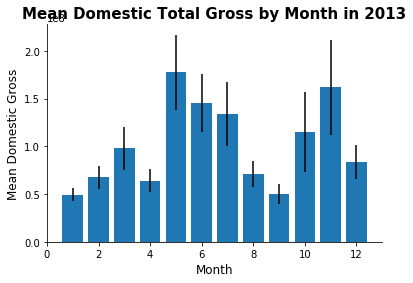

In [107]:
# plot
plt.bar(month,gross, yerr=SEs);
plt.title('Mean Domestic Total Gross by Month in 2013', fontsize = 15, weight = 'bold')
plt.ylabel('Mean Domestic Gross', fontsize = 12)
plt.xlabel('Month', fontsize = 12)
sns.despine()

These error bars seem reasonible, as the higher grossing months have larger error bars. This seems to be due the the fact that the high mean for these months is more due to exceptionally high grossing movies.